# Lab 2
# Roman Ahmad Zeia - 100812974 
# Classification 2

In [40]:
# Roman Ahmad Zeia 100821974
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree 
import matplotlib.pyplot as plt
import ucimlrepo
from ucimlrepo import fetch_ucirepo 


In [41]:
waveform_database_generator_version_1 = fetch_ucirepo(id=107) 
  
X_waveform = waveform_database_generator_version_1.data.features 
y_waveform = waveform_database_generator_version_1.data.targets 

statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# clean up data and hot encode categorical data for credit dataset
X_credit = statlog_german_credit_data.data.features
categorical_credit_col = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7', 'Attribute9', 'Attribute10','Attribute12','Attribute14','Attribute15','Attribute17', 'Attribute19','Attribute20']
X_credit = pd.get_dummies(X_credit, columns= categorical_credit_col)


y_credit = statlog_german_credit_data.data.targets 

# Part 1 Interference Efficiency

### 1. Perform preprocessing if its necessary
### 2. Build k-NN classifier for k = 5:
###     A. Use 90% 10% split, perform 5 times. final results are the average of trails performance
###     B. Report final average F-measure, average test time. Use a print statement.
### 3. Repeat 2 with a decision tree classifier default parameters.
### 4. Compare the two using appropriate charts.


In [42]:
# Part 1

#Create functions for knn classifier and decision tree classifier

%matplotlib inline


def split_data(X, y, test_size=0.1):
    return train_test_split(X, y, test_size=test_size, random_state=None)


def evaluate_knn(X, y, k=5, trials=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    f_measures = []
    test_times = []
    
    for _ in range(trials):
        X_train, X_test, y_train, y_test = split_data(X_scaled, y)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        start_time = time.time()
        y_pred = knn.predict(X_test)
        test_time = time.time() - start_time
        test_times.append(test_time)
        
        f1 = f1_score(y_test, y_pred, average='weighted')
        f_measures.append(f1)
    
    avg_f_measure = np.mean(f_measures)
    avg_test_time = np.mean(test_times)
    
    print(f"k-NN Classifier (k={k}): Avg F-measure = {avg_f_measure}, Avg Test Time = {avg_test_time} seconds")
    return avg_f_measure, avg_test_time


def evaluate_decision_tree(X, y, trials=5):
    f_measures = []
    test_times = []
    
    for _ in range(trials):
        X_train, X_test, y_train, y_test = split_data(X, y)
        
        model = tree.DecisionTreeClassifier()
        model.fit(X_train, y_train)
        
        start_time = time.time()
        y_pred = model.predict(X_test)
        test_time = time.time() - start_time
        test_times.append(test_time)
        
        f1 = f1_score(y_test, y_pred, average='weighted')
        f_measures.append(f1)
    
    avg_f_measure = np.mean(f_measures)
    avg_test_time = np.mean(test_times)
    
    print(f"Decision Tree Classifier: Avg F-measure = {avg_f_measure}, Avg Test Time = {avg_test_time} seconds")
    return avg_f_measure, avg_test_time


In [43]:
# Part 1 with waveform data
knn_f_measure_waveform, knn_test_time_waveform = evaluate_knn(X_waveform, y_waveform)
tree_f_measure_waveform, tree_test_time_waveform = evaluate_decision_tree(X_waveform, y_waveform)

results = {
    'Model': ['k-NN', 'Decision Tree'],
    'F-measure': [knn_f_measure_waveform, tree_f_measure_waveform],
    'Test Time (seconds)': [knn_test_time_waveform, tree_test_time_waveform]
}





/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A

k-NN Classifier (k=5): Avg F-measure = 0.8029, Avg Test Time = 0.0069 seconds
Decision Tree Classifier: Avg F-measure = 0.7476, Avg Test Time = 0.0008 seconds


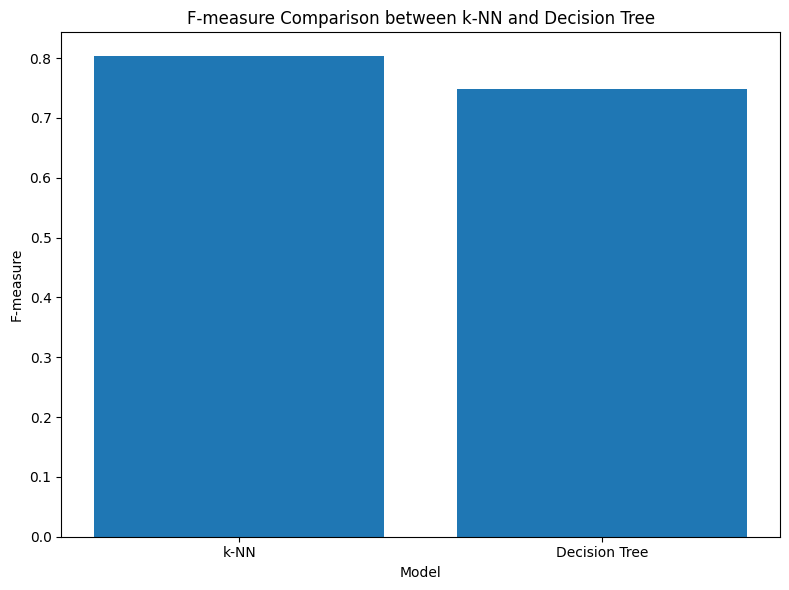

In [44]:
import matplotlib.pyplot as plt

models = ['k-NN', 'Decision Tree']
f_measures = [knn_f_measure_waveform, tree_f_measure_waveform]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, f_measures)

ax.set_title('F-measure Comparison between k-NN and Decision Tree')
ax.set_xlabel('Model')
ax.set_ylabel('F-measure')

plt.tight_layout()
plt.show()


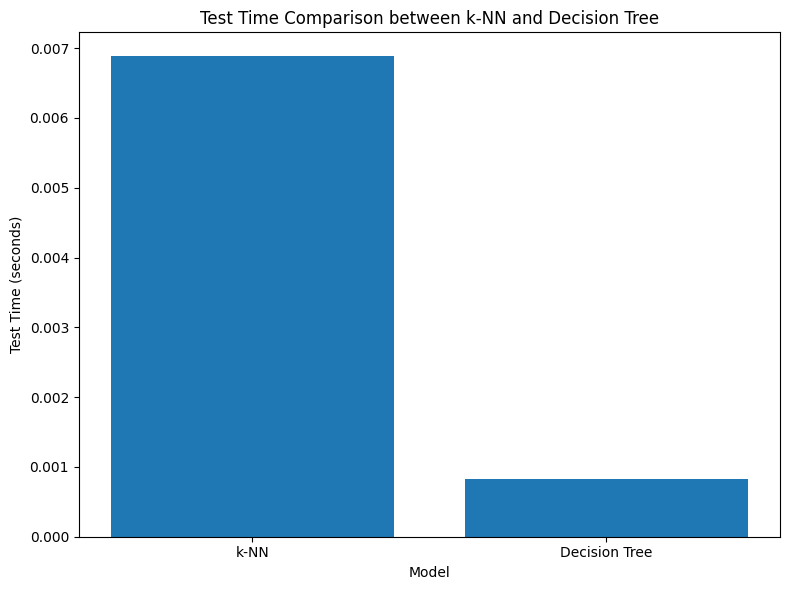

In [45]:
test_times = [knn_test_time_waveform, tree_test_time_waveform]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, test_times)

ax.set_title('Test Time Comparison between k-NN and Decision Tree',)
ax.set_xlabel('Model')
ax.set_ylabel('Test Time (seconds)')

plt.tight_layout()
plt.show()


In [46]:
# Part 1 with credit data

knn_f_measure_credit, knn_test_time_credit = evaluate_knn(X_credit, y_credit)
tree_f_measure_credit, tree_test_time_credit = evaluate_decision_tree(X_credit, y_credit)

results = {
    'Model': ['k-NN', 'Decision Tree'],
    'F-measure': [knn_f_measure_credit, tree_f_measure_credit],
    'Test Time (seconds)': [knn_test_time_credit, tree_test_time_credit]
}



k-NN Classifier (k=5): Avg F-measure = 0.6936, Avg Test Time = 0.0012 seconds
Decision Tree Classifier: Avg F-measure = 0.6779, Avg Test Time = 0.0010 seconds


/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A

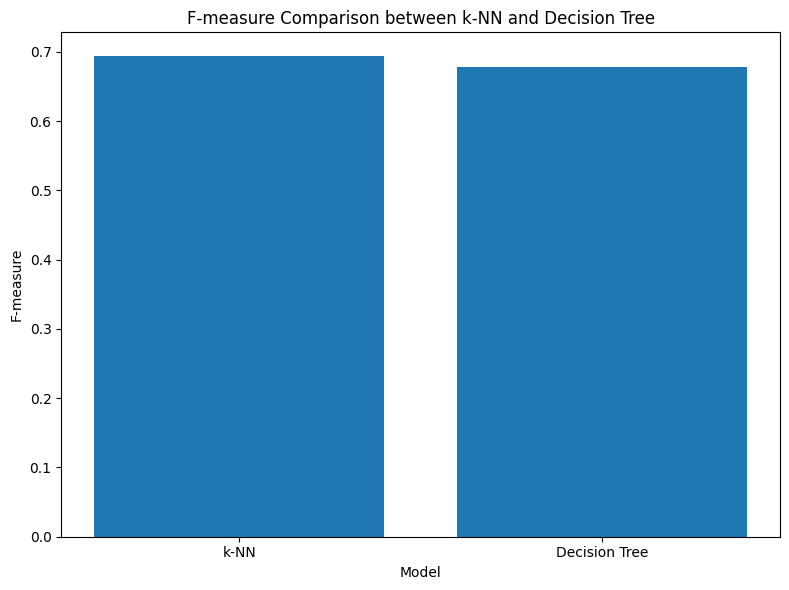

In [47]:
import matplotlib.pyplot as plt

models = ['k-NN', 'Decision Tree']
f_measures = [knn_f_measure_credit, tree_f_measure_credit]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, f_measures)

ax.set_title('F-measure Comparison between k-NN and Decision Tree')
ax.set_xlabel('Model')
ax.set_ylabel('F-measure')

plt.tight_layout()
plt.show()

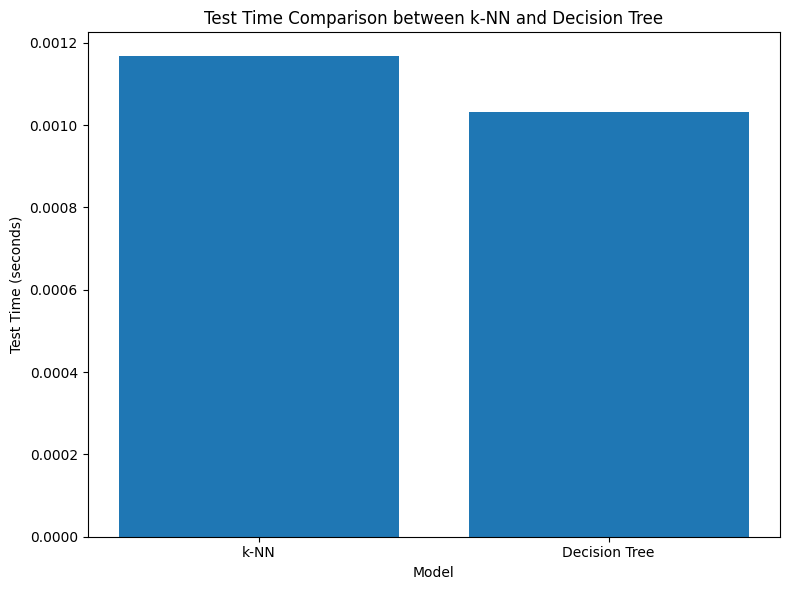

In [48]:
test_times = [knn_test_time_credit, tree_test_time_credit]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, test_times)

ax.set_title('Test Time Comparison between k-NN and Decision Tree',)
ax.set_xlabel('Model')
ax.set_ylabel('Test Time (seconds)')

plt.tight_layout()
plt.show()

# Part 2 

# 1. Build k-NN classifier for different k (1,2,3,4,5) and select best k
###     A. 90% 10% split, 10% of train for validation
###     B. build k-NN model using the train data set and select best k based on F-measure on the validation set
# 2. Build decision tree model using the train data set and select the best tree:
###     A. Change tree depth (3,4,...10) and calculate F-measure on the validation set
###     B. Select the best depth based on F-measure on the validation set

In [49]:
# Waveform


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_waveform)


X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_waveform, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

def knn_model_selection(X_train, y_train, X_val, y_val, k_values=[1, 2, 3, 4, 5]):
    best_k = None
    best_f_measure = 0
    f_measures = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_val_pred = knn.predict(X_val)
        
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        f_measures.append(f1)
        
        if f1 > best_f_measure:
            best_f_measure = f1
            best_k = k
    
    print(f"Best k: {best_k}, with F-measure: {best_f_measure:.4f}")
    
    return best_k, f_measures

best_k, f_measures_knn = knn_model_selection(X_train, y_train, X_val, y_val)


Best k: 5, with F-measure: 0.8024


/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A

In [50]:
#Waveform

def tree_model_selection(X_train, y_train, X_val, y_val, depths=range(3, 11)):
    best_depth = None
    best_f_measure = 0
    f_measures = []
    
    for depth in depths:
        model = tree.DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        f_measures.append(f1)
        
        if f1 > best_f_measure:
            best_f_measure = f1
            best_depth = depth
    
    print(f"Best Depth: {best_depth}, with F-measure: {best_f_measure:.4f}")
    
    return best_depth, f_measures

best_depth, f_measures_tree = tree_model_selection(X_train, y_train, X_val, y_val)


Best Depth: 9, with F-measure: 0.7529


In [51]:
# Credit
scaler = StandardScaler()
X_scaled_credit = scaler.fit_transform(X_credit)

X_train_full_credit, X_test_credit, y_train_full_credit, y_test_credit = train_test_split(X_scaled_credit, y_credit, test_size=0.1, random_state=42)

X_train_credit, X_val_credit, y_train_credit, y_val_credit = train_test_split(X_train_full_credit, y_train_full_credit, test_size=0.1, random_state=42)


In [52]:
best_k_credit, f_measures_knn_credit = knn_model_selection(X_train_credit, y_train_credit, X_val_credit, y_val_credit)


Best k: 5, with F-measure: 0.7353


/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/Desktop/School/Year_4/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A

In [53]:
best_depth_credit, f_measures_tree_credit = tree_model_selection(X_train_credit, y_train_credit, X_val_credit, y_val_credit)


Best Depth: 7, with F-measure: 0.7035
